In [9]:
# First, install the required dependency
!pip install xlrd>=2.0.1

# Then run your original code
import pandas as pd
df = pd.read_excel("C:\\Users\\devya\\OneDrive\\Desktop\\pyhton pigm\\gba.xls")
print(df.head(10))

                                                text  thumbsUp
0                                               good         0
1                                       nice clothes         0
2                                               good         0
3  something are not available here like mono col...         0
4                                               good         0
5                                           nice app         0
6                                             Good 👍         0
7                                          very good         0
8                                            nyc....         0
9  For shopping this aap is good but when time to...         0


In [10]:
pip install nltk

  Using cached click-8.2.1-py3-none-any.whl.metadata (2.5 kB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------- ----- 1.3/1.5 MB 6.7 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 6.6 MB/s eta 0:00:00
Using cached click-8.2.1-py3-none-any.whl (102 kB)

   ---------------------------------------- 0/5 [tqdm]
   -------- ------------------------------- 1/5 [regex]
   ---------------- ----------------------- 2/5 [joblib]
   ---------------- ----------------------- 2/5 [joblib]
   ---------------- ----------------------- 2/5 [joblib]
   ------------------------ --------------- 3/5 [click]
   -------------------------------- ------- 4/5 [nltk]
   -------------------------------- ------- 4/5 [nltk]
   -------------------------------- ------- 4/5 [nltk]
   -------------------------------- ------- 4/5 [nltk]
   -------------------------------- ------- 4/5 [nltk]
   -------------------------------- ------- 4/5 [nlt

In [1]:
pip install textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 3.9 MB/s  0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
from textblob import TextBlob

# --- 1. Load the preprocessed Excel file ---

# PASTE THE CORRECT FILE PATH HERE
# If the file is in the same directory, 'preprocessed_data.xlsx' should work.
# If not, it will look something like 'C:/Users/YourUser/Documents/preprocessed_data.xlsx'
file_to_analyze = r"C:\Users\devya\OneDrive\Desktop\python\preprocessed_data.xlsx" # <-- UPDATE THIS LINE IF NEEDED

# Use a try-except block for robust error handling
try:
    df = pd.read_excel(file_to_analyze)
    print(f"Successfully loaded '{file_to_analyze}'")
except FileNotFoundError:
    print(f"ERROR: The file '{file_to_analyze}' was not found.")
    print("Please ensure the file exists and the path is correct.")
    # Stop execution if the file isn't found
    df = None

# Proceed only if the DataFrame was loaded successfully
if df is not None:
    # --- 2. Perform Sentiment Analysis ---

    def join_tokens(tokens):
        # This handles the string representation of a list e.g., "['word1', 'word2']"
        # which can happen when reading from Excel.
        try:
            # Safely evaluate the string as a Python literal (list)
            from ast import literal_eval
            if isinstance(tokens, str):
                tokens = literal_eval(tokens)
            if isinstance(tokens, list):
                return ' '.join(tokens)
        except (ValueError, SyntaxError):
            # If it's not a list-like string or is malformed, return empty
            return ''
        return ''

    df['clean_text_for_sentiment'] = df['no_stopwords_text'].apply(join_tokens)

    def get_sentiment_polarity(text):
        return TextBlob(text).sentiment.polarity

    df['sentiment_score'] = df['clean_text_for_sentiment'].apply(get_sentiment_polarity)

    def get_sentiment_category(score):
        if score > 0:
            return 'Positive'
        elif score < 0:
            return 'Negative'
        else:
            return 'Neutral'

    df['sentiment_category'] = df['sentiment_score'].apply(get_sentiment_category)

    # --- 3. Save the results to a new Excel file ---
    output_sentiment_file = 'sentiment_analysis_results.xlsx'
    df.to_excel(output_sentiment_file, index=False, sheet_name='sentiment_results')

    print(f"Sentiment analysis complete. Results saved to '{output_sentiment_file}'")
    print("\nHere's a preview of the results:")
    print(df[['text', 'no_stopwords_text', 'sentiment_score', 'sentiment_category']].head())

Successfully loaded 'C:\Users\devya\OneDrive\Desktop\python\preprocessed_data.xlsx'
Sentiment analysis complete. Results saved to 'sentiment_analysis_results.xlsx'

Here's a preview of the results:
                                                text  \
0                                               good   
1                                       nice clothes   
2                                               good   
3  something are not available here like mono col...   
4                                               good   

                                   no_stopwords_text  sentiment_score  \
0                                           ['good']              0.7   
1                                ['nice', 'clothes']              0.6   
2                                           ['good']              0.7   
3  ['something', 'available', 'like', 'mono', 'co...              0.4   
4                                           ['good']              0.7   

  sentiment_category  
0  

In [10]:
pip install matplotlib seaborn


   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------- -------------------------------- 1.6/8.1 MB 7.6 MB/s eta 0:00:01
   ---------------- ----------------------- 3.4/8.1 MB 8.1 MB/s eta 0:00:01
   ------------------------ --------------- 5.0/8.1 MB 8.2 MB/s eta 0:00:01
   --------------------------------- ------ 6.8/8.1 MB 8.4 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 8.1 MB/s  0:00:01
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   --------------------------- ------------ 1.6/2.3 MB 7.6 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 8.0 MB/s  0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ------ --------------------------------- 1.0/7.0 MB 10.1 MB/s eta 0:00:01
   --------- ------------------------------ 1.6/7.0 MB 4.7 MB/s eta 0:00:02
   ------------ --------------------------- 2.1/7.0 MB 3.7 MB/s eta 0:00:02
   --------------- ------------------

Matplotlib is building the font cache; this may take a moment.


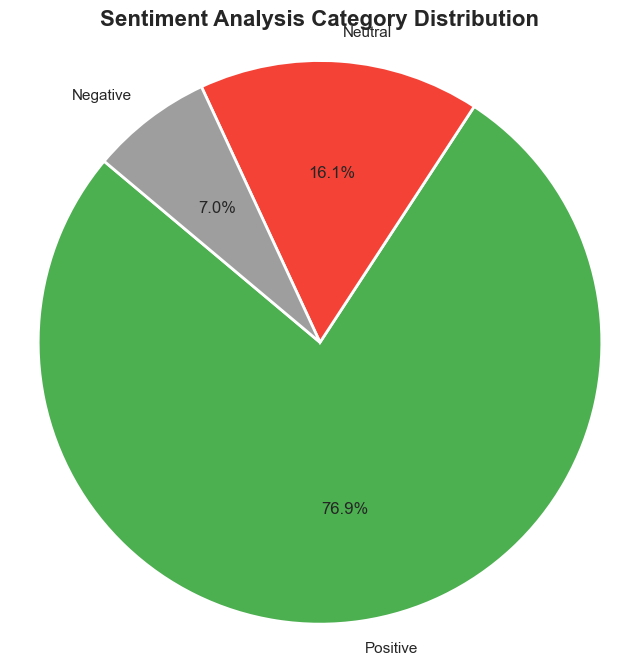

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# This assumes your DataFrame 'df' is already loaded.
# If not: df = pd.read_excel('sentiment_analysis_results.xlsx')

# --- 1. Calculate the counts for each sentiment category ---
sentiment_counts = df['sentiment_category'].value_counts()

# --- 2. Set the theme and color palette using Seaborn ---
sns.set_theme(style="whitegrid")
# Use a Seaborn color palette or define your own
colors = ['#4CAF50', '#F44336', '#9E9E9E'] # Green, Red, Grey

# --- 3. Create the pie chart using Matplotlib, which will adopt Seaborn's style ---
plt.figure(figsize=(8, 8))
plt.pie(
    sentiment_counts,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2} # Add white lines between wedges for a cleaner look
)

# --- 4. Customize and show the plot ---
plt.title('Sentiment Analysis Category Distribution', fontsize=16, fontweight='bold')
plt.axis('equal') # Ensures the pie is a circle
plt.show()

In [12]:
pip install scikit-learn


   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ----- ---------------------------------- 1.3/8.9 MB 9.6 MB/s eta 0:00:01
   --------------- ------------------------ 3.4/8.9 MB 8.0 MB/s eta 0:00:01
   --------------------- ------------------ 4.7/8.9 MB 7.5 MB/s eta 0:00:01
   ------------------------- -------------- 5.8/8.9 MB 6.9 MB/s eta 0:00:01
   ----------------------------- ---------- 6.6/8.9 MB 6.3 MB/s eta 0:00:01
   --------------------------------- ------ 7.3/8.9 MB 5.7 MB/s eta 0:00:01
   ------------------------------------- -- 8.4/8.9 MB 5.5 MB/s eta 0:00:01
   ---------------------------------------- 8.9/8.9 MB 5.2 MB/s  0:00:01
   ---------------------------------------- 0.0/41.3 MB ? eta -:--:--
   - -------------------------------------- 1.3/41.3 MB 6.7 MB/s eta 0:00:06
   -- ------------------------------------- 2.6/41.3 MB 6.6 MB/s eta 0:00:06
   ---- ----------------------------------- 4.2/41.3 MB 6.8 MB/s eta 0:00:06
   ----- ---------------

In [13]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from ast import literal_eval

# --- 1. Load the Data and Prepare it for Modeling ---

# Load the results from your last step
file_to_model = 'sentiment_analysis_results.xlsx'
df = pd.read_excel(file_to_model)

# The 'no_stopwords_text' column was saved as a string representation of a list.
# We need to convert it back into a proper list and then join it into a single string per document.
def join_tokens_from_string(text_list_str):
    try:
        # Safely evaluate the string to get the list
        tokens = literal_eval(text_list_str)
        if isinstance(tokens, list):
            return ' '.join(tokens)
    except (ValueError, SyntaxError):
        # Handle cases where the cell might be empty or malformed
        return ''
    return ''

# Create a new column with the clean, joined text ready for vectorization
df['text_for_modeling'] = df['no_stopwords_text'].apply(join_tokens_from_string)


# --- 2. Vectorize the Text using TF-IDF ---

# Initialize the TF-IDF Vectorizer
# max_df=0.95 ignores terms that appear in more than 95% of the documents (too common)
# min_df=2 ignores terms that appear in less than 2 documents (too rare)
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

# Fit and transform the text data to create a document-term matrix
tfidf = vectorizer.fit_transform(df['text_for_modeling'])

# Get the actual words (features) from the vectorizer
feature_names = vectorizer.get_feature_names_out()


# --- 3. Apply NMF to Discover Topics ---

# Set the number of topics
num_topics = 5

# Initialize the NMF model
# random_state ensures that the results are reproducible
nmf_model = NMF(n_components=num_topics, random_state=42, max_iter=500)

# Fit the NMF model to the TF-IDF data
nmf_model.fit(tfidf)


# --- 4. Display the Topics ---

# This function will display the top words for each topic
def display_topics(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        # Get the indices of the top words for this topic
        top_word_indices = topic.argsort()[:-num_top_words - 1:-1]
        # Get the actual words from the indices
        top_words = [feature_names[i] for i in top_word_indices]
        print(f"Topic #{topic_idx + 1}: {' '.join(top_words)}")

# Define how many top words you want to see for each topic
num_top_words = 10

print("Discovered Topics and their Top Words:\n")
display_topics(nmf_model, feature_names, num_top_words)


# --- 5. (Optional but Recommended) Assign a Dominant Topic to Each Document ---

# Transform the TF-IDF data to get the document-topic distribution
W = nmf_model.transform(tfidf)

# Find the index of the topic with the highest score for each document
dominant_topic = W.argmax(axis=1)

# Add the dominant topic number as a new column in the DataFrame
df['dominant_topic'] = dominant_topic + 1 # Add 1 to make topics 1-5 instead of 0-4

print("\nPreview of DataFrame with Dominant Topic Assigned:")
print(df[['text', 'dominant_topic', 'sentiment_category']].head())

# You can now save this new DataFrame to another Excel file if you wish
# df.to_excel('topic_modeling_results.xlsx', index=False)

Discovered Topics and their Top Words:

Topic #1: good service app product products quality flipkart work experience application
Topic #2: nice app product flipkart service aap work products verry beautiful
Topic #3: best app shopping product flipkart online platform quality service worst
Topic #4: super service quality app product flipkart delivery bro hero tq
Topic #5: ok thanks service flipkart delivery condition try thnks deal thak

Preview of DataFrame with Dominant Topic Assigned:
                                                text  dominant_topic  \
0                                               good               1   
1                                       nice clothes               2   
2                                               good               1   
3  something are not available here like mono col...               3   
4                                               good               1   

  sentiment_category  
0           Positive  
1           Positive  
2     

Generating Bar Charts for Each Topic's Top Words...



C:\Users\devya\AppData\Local\Temp\ipykernel_27864\580405904.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


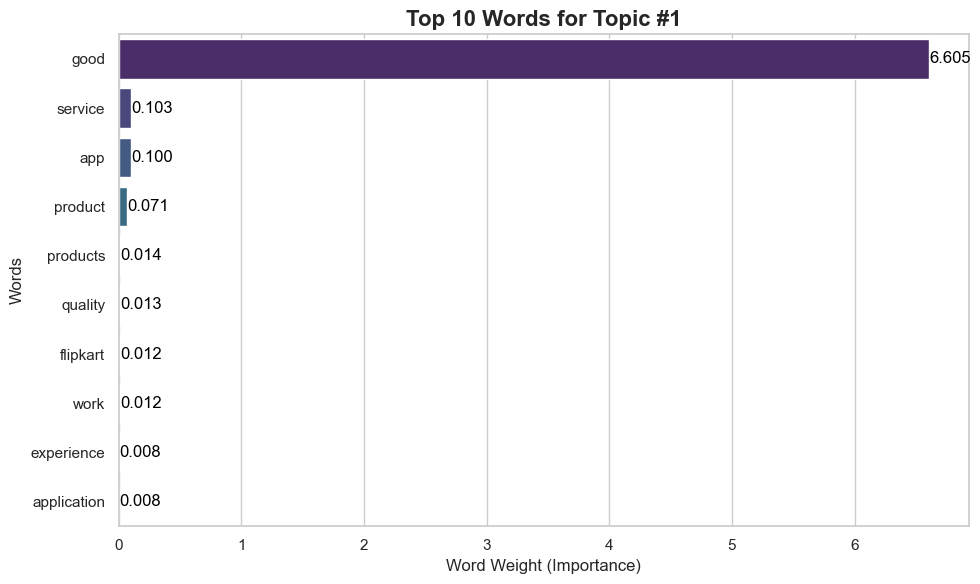

C:\Users\devya\AppData\Local\Temp\ipykernel_27864\580405904.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


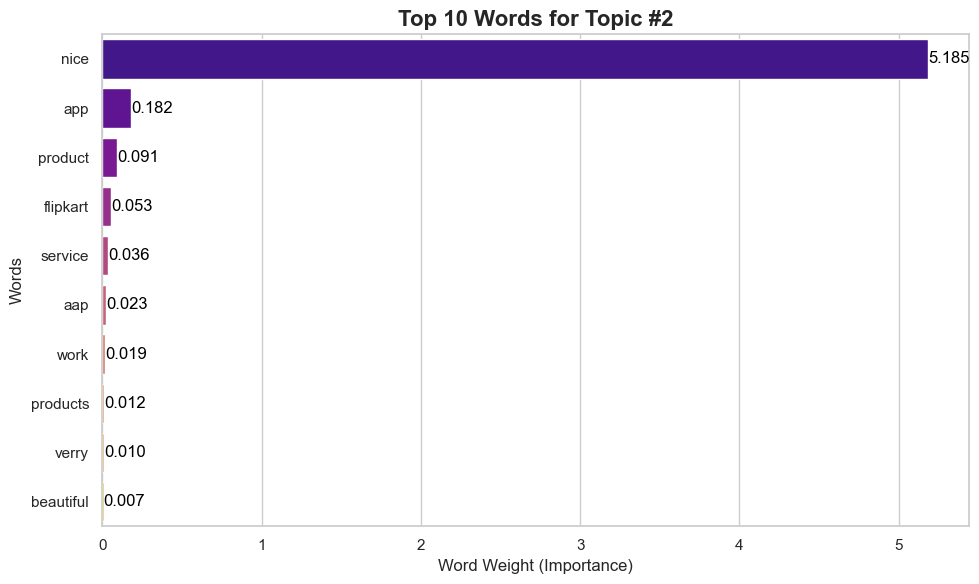

C:\Users\devya\AppData\Local\Temp\ipykernel_27864\580405904.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


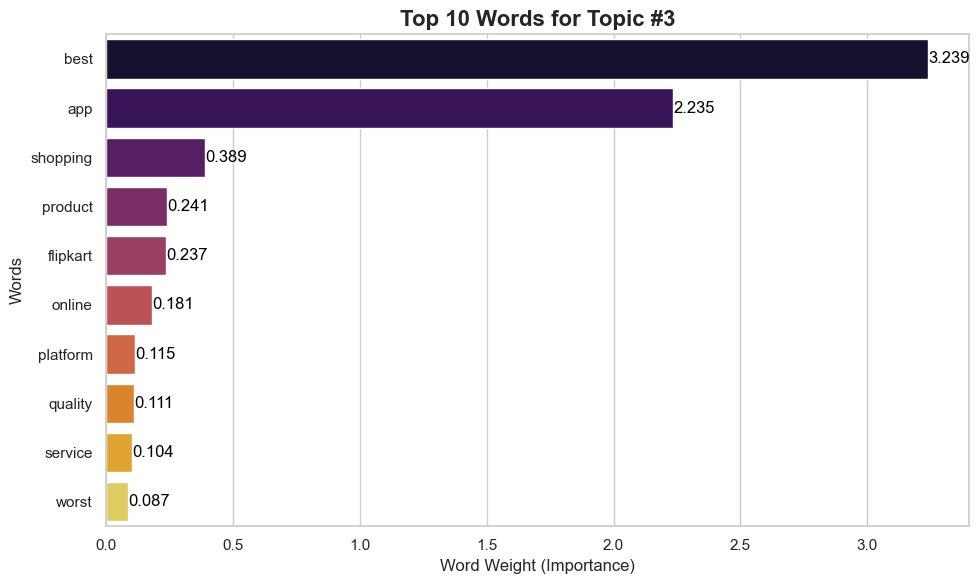

C:\Users\devya\AppData\Local\Temp\ipykernel_27864\580405904.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


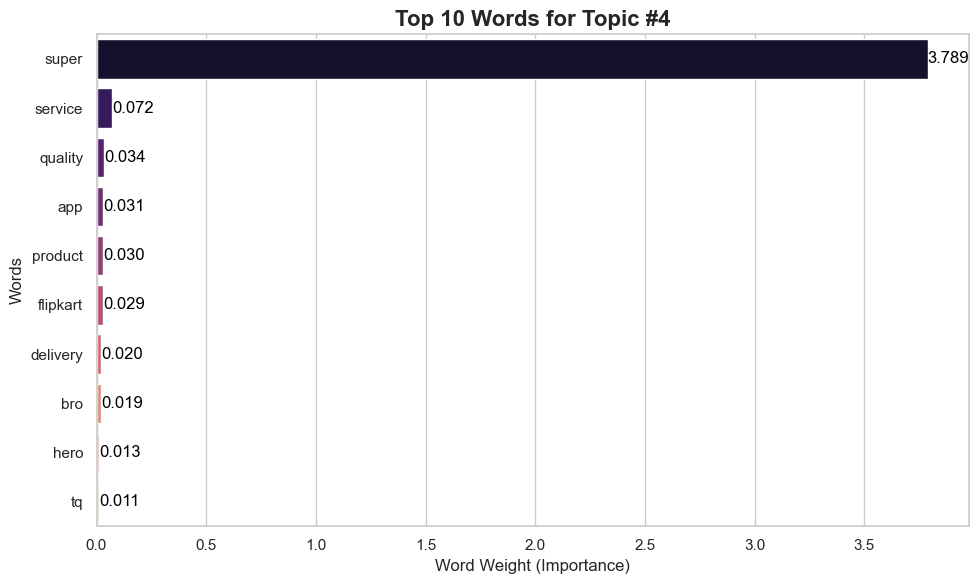

C:\Users\devya\AppData\Local\Temp\ipykernel_27864\580405904.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


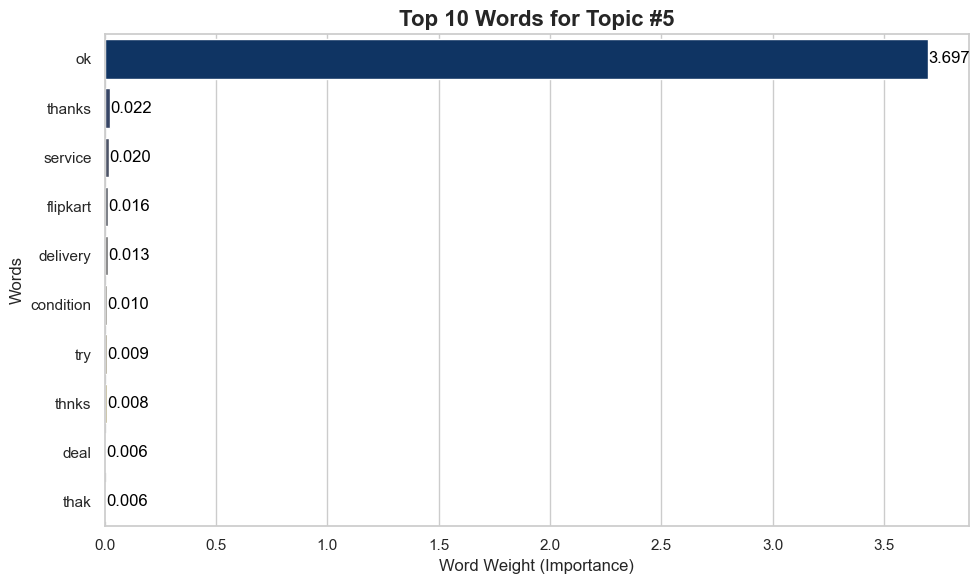

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Define Parameters for Visualization ---

# Define how many top words you want to display in each chart
num_top_words = 10

# Get the topic-word matrix from the fitted NMF model
topic_word_matrix = nmf_model.components_

# Define a list of color palettes to make each chart visually distinct
palettes = ['viridis', 'plasma', 'inferno', 'magma', 'cividis']


# --- 2. Loop Through Each Topic and Create a Bar Chart ---

print("Generating Bar Charts for Each Topic's Top Words...\n")

for topic_idx, topic in enumerate(topic_word_matrix):
    # --- Create a DataFrame for the current topic's top words ---
    # Get the indices of the top words for this topic by sorting the weights
    top_word_indices = topic.argsort()[:-num_top_words - 1:-1]
    
    # Get the actual words and their weights
    top_words = [feature_names[i] for i in top_word_indices]
    top_weights = [topic[i] for i in top_word_indices]
    
    # Create a DataFrame to make plotting easier with Seaborn
    topic_df = pd.DataFrame({'word': top_words, 'weight': top_weights})
    
    # --- Create the plot for the current topic ---
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(10, 6)) # Set the figure size
    
    # Create the horizontal bar plot
    ax = sns.barplot(
        x='weight',
        y='word',
        data=topic_df,
        palette=palettes[topic_idx % len(palettes)] # Use a different palette for each topic
    )
    
    # --- Customize and show the plot ---
    plt.title(f'Top {num_top_words} Words for Topic #{topic_idx + 1}', fontsize=16, fontweight='bold')
    plt.xlabel('Word Weight (Importance)', fontsize=12)
    plt.ylabel('Words', fontsize=12)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    
    # Add the weight value as a label on each bar for clarity
    for i, v in enumerate(topic_df['weight']):
        ax.text(v + 0.001, i, f'{v:.3f}', color='black', va='center', fontweight='medium')

    plt.tight_layout() # Adjust layout to make sure everything fits
    plt.show()

In [15]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


Generating Word Clouds for Each Topic...



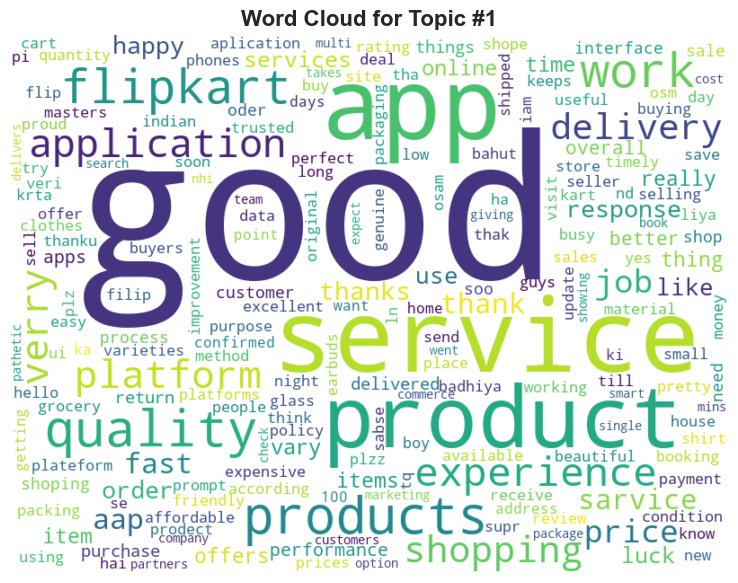

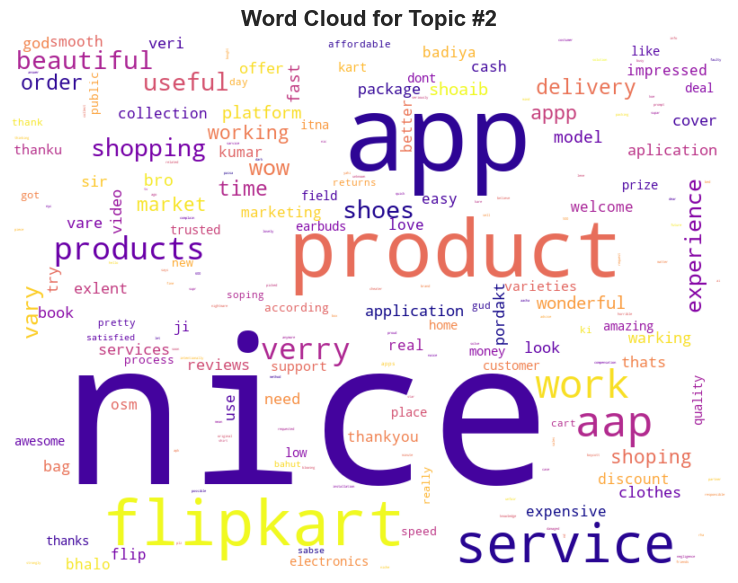

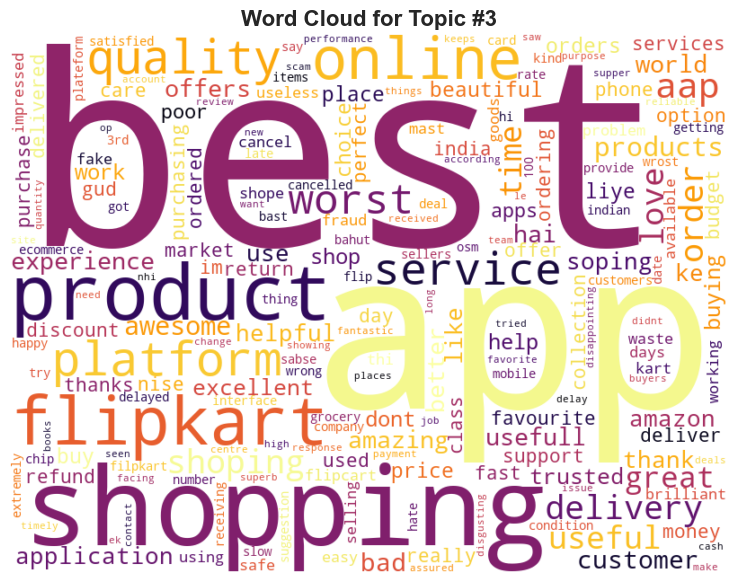

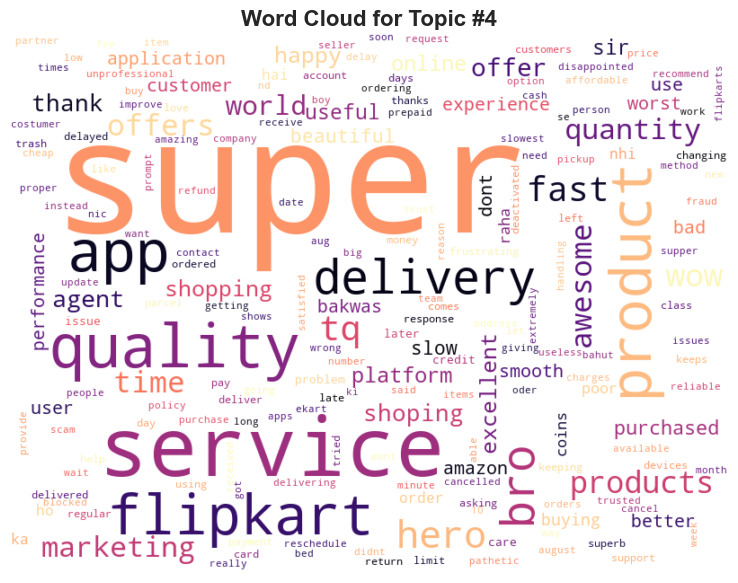

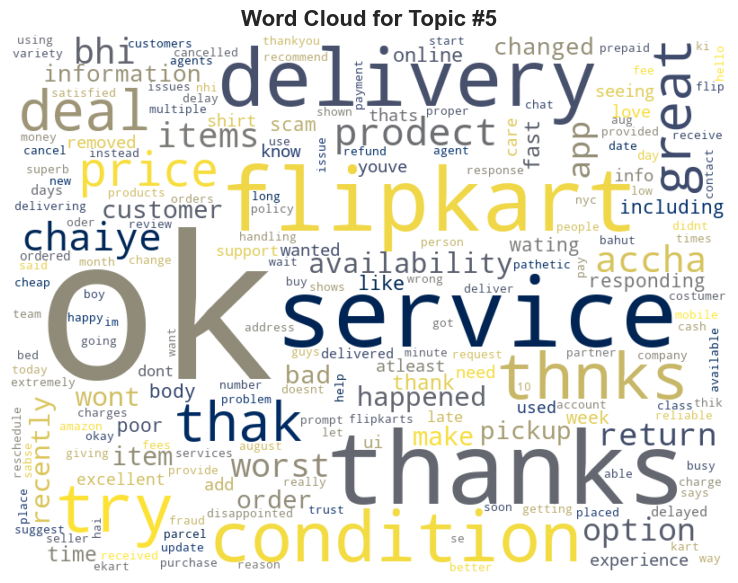

In [16]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# This code assumes 'nmf_model' and 'feature_names' are already defined from the previous step.

# --- 1. Get the topic-word matrix ---
topic_word_matrix = nmf_model.components_

# Define a list of colormaps for visual distinction between word clouds
colormaps = ['viridis', 'plasma', 'inferno', 'magma', 'cividis']

print("Generating Word Clouds for Each Topic...\n")

# --- 2. Loop through each topic and generate a word cloud ---
for topic_idx, topic in enumerate(topic_word_matrix):
    
    # --- Create a dictionary of words and their weights for the current topic ---
    # The WordCloud object works best with a dictionary of frequencies.
    # We will use the NMF weights as our "frequencies".
    topic_words_weights = {feature_names[i]: topic[i] for i in range(len(feature_names))}
    
    # --- Create and configure the WordCloud object ---
    wc = WordCloud(
        background_color='white',
        width=800,
        height=600,
        colormap=colormaps[topic_idx % len(colormaps)] # Cycle through our colormaps
    )
    
    # --- Generate the word cloud from the frequencies (weights) ---
    wc.generate_from_frequencies(topic_words_weights)
    
    # --- Use Matplotlib to display the generated image ---
    plt.figure(figsize=(10, 7))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off") # Hide the axes
    plt.title(f'Word Cloud for Topic #{topic_idx + 1}', fontsize=16, fontweight='bold')
    plt.show()

In [7]:
import pandas as pd
import nltk
from collections import Counter
from ast import literal_eval

# --- 1. Load and Prepare the Data ---

# Load the Excel file containing your preprocessed data
file_path = 'sentiment_analysis_results.xlsx'
df = pd.read_excel(file_path)

# The 'no_stopwords_text' column is stored as a string representation of a list.
# We need to safely convert it back to a list object.
def safe_literal_eval(data):
    try:
        # Safely evaluate the string into a Python list
        return literal_eval(data)
    except (ValueError, SyntaxError):
        # If the cell is empty, NaN, or malformed, return an empty list
        return []

# Apply the conversion to the column
df['token_list'] = df['no_stopwords_text'].apply(safe_literal_eval)

# Create one single, flat list of all tokens from all documents
# This is the input we need for the n-gram functions
all_tokens = [token for sublist in df['token_list'] for token in sublist]


# --- 2. Generate and Count Bigrams ---

# Generate a list of bigrams from our master list of tokens
bigram_list = list(nltk.bigrams(all_tokens))

# Use collections.Counter to get the frequency of each bigram
bigram_freq = Counter(bigram_list)

# --- 3. Generate and Count Trigrams ---

# Generate a list of trigrams
trigram_list = list(nltk.trigrams(all_tokens))

# Get the frequency of each trigram
trigram_freq = Counter(trigram_list)


# --- 4. Display the Most Common N-grams ---

# Define how many top n-grams you want to see
num_to_display = 20

print(f"--- Top {num_to_display} Most Common Bigrams ---\n")
for bigram, count in bigram_freq.most_common(num_to_display):
    # Join the words in the tuple for better readability
    print(f"{' '.join(bigram)}: {count}")

print(f"\n--- Top {num_to_display} Most Common Trigrams ---\n")
for trigram, count in trigram_freq.most_common(num_to_display):
    print(f"{' '.join(trigram)}: {count}")

--- Top 20 Most Common Bigrams ---

good good: 725
good nice: 277
nice good: 256
app good: 145
good app: 129
nice nice: 96
good best: 92
good service: 87
nice app: 80
good super: 80
customer care: 78
best app: 78
super good: 71
flipkart good: 70
good product: 62
good ok: 61
app nice: 58
product good: 56
ok good: 55
best good: 55

--- Top 20 Most Common Trigrams ---

good good good: 234
nice good good: 85
good good nice: 78
good nice good: 74
good good app: 43
app good good: 38
good good best: 36
good app good: 34
good nice app: 32
nice good nice: 30
good nice nice: 29
nice app good: 27
good service good: 26
nice nice good: 25
good best app: 24
good good super: 23
good good service: 23
super good good: 22
good ok good: 21
good good product: 21
